In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")


In [2]:
print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)

print("\nSentiment missing values:\n", sentiment.isna().sum())
print("\nTrades missing values:\n", trades.isna().sum())

print("\nSentiment duplicates:", sentiment.duplicated().sum())
print("Trades duplicates:", trades.duplicated().sum())



Sentiment shape: (2644, 4)
Trades shape: (211224, 16)

Sentiment missing values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Trades missing values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Sentiment duplicates: 0
Trades duplicates: 0


In [3]:
sentiment["timestamp"] = pd.to_datetime(sentiment["timestamp"], unit="s")
sentiment["date"] = sentiment["timestamp"].dt.date


trades["Timestamp IST"] = pd.to_datetime(trades["Timestamp IST"], format="%d-%m-%Y %H:%M")
trades["date"] = trades["Timestamp IST"].dt.date


In [4]:
sentiment[["timestamp", "date"]].head()

,timestamp,date
0,2018-02-01 05:30:00,2018-02-01
1,2018-02-02 05:30:00,2018-02-02
2,2018-02-03 05:30:00,2018-02-03
3,2018-02-04 05:30:00,2018-02-04
4,2018-02-05 05:30:00,2018-02-05


In [5]:
trades[["Timestamp IST", "date"]].head()

,Timestamp IST,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [6]:
trades = trades.rename(columns={
    "Account": "account",
    "Coin": "coin",
    "Execution Price": "execution_price",
    "Size Tokens": "size_tokens",
    "Size USD": "size_usd",
    "Side": "side",
    "Direction": "direction",
    "Start Position": "start_position",
    "Closed PnL": "closed_pnl",
    "Fee": "fee",
    "Trade ID": "trade_id",
    "Order ID": "order_id",
    "Transaction Hash": "tx_hash",
    "Crossed": "crossed",
    "Timestamp IST": "timestamp_ist",
    "Timestamp": "timestamp_raw"
})


In [7]:
daily_pnl = trades.groupby(["account", "date"])["closed_pnl"].sum().reset_index()
daily_pnl = daily_pnl.rename(columns={"closed_pnl": "daily_pnl"})


In [ ]:
daily_pnl.head()

,account,date,daily_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


In [ ]:
daily_trades = trades.groupby(["account", "date"]).size().reset_index(name="trades_count")

In [ ]:
daily_trades.head()

,account,date,trades_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,12
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,27


In [ ]:
print(trades.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'tx_hash',
       'order_id', 'crossed', 'fee', 'trade_id', 'timestamp_raw', 'date'],
      dtype='str')


In [12]:
daily_avg_size = trades.groupby(["account", "date"])["size_usd"].mean().reset_index()
daily_avg_size = daily_avg_size.rename(columns={"size_usd": "avg_trade_size_usd"})
daily_avg_size.head()

,account,date,avg_trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,5089.718249
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,7976.664412
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,23734.500000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,28186.666667
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,17248.148148


In [ ]:
trades["is_win"] = trades["closed_pnl"] > 0
daily_winrate = trades.groupby(["account", "date"])["is_win"].mean().reset_index()
daily_winrate = daily_winrate.rename(columns={"is_win": "win_rate"})

In [ ]:
daily_winrate.head()

,account,date,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,0.444444


In [ ]:
ls_counts = trades.groupby(["date", "side"]).size().unstack(fill_value=0)
ls_counts.head()

side,BUY,SELL
date,,
2023-05-01,3,0
2023-12-05,7,2
2023-12-14,5,6
2023-12-15,2,0
2023-12-16,3,0


In [19]:
ls_counts["long_short_ratio"] = ls_counts.get("BUY", 0) / ls_counts.get("SELL", 1)
ls_ratio = ls_counts.reset_index()[["date", "long_short_ratio"]]

In [ ]:
ls_ratio.head()

side,date,long_short_ratio
0,2023-05-01,inf
1,2023-12-05,3.500000
2,2023-12-14,0.833333
3,2023-12-15,inf
4,2023-12-16,inf


In [ ]:
print(trades.columns)
#I want to check for leverage distribution.

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'tx_hash',
       'order_id', 'crossed', 'fee', 'trade_id', 'timestamp_raw', 'date',
       'is_win'],
      dtype='str')


In [22]:
daily_metrics = daily_pnl \
    .merge(daily_trades, on=["account", "date"], how="left") \
    .merge(daily_avg_size, on=["account", "date"], how="left") \
    .merge(daily_winrate, on=["account", "date"], how="left")

daily_metrics = daily_metrics.merge(ls_ratio, on="date", how="left")

daily_metrics = daily_metrics.merge(
    sentiment[["date", "classification"]],
    on="date",
    how="left"
)
daily_metrics["long_short_ratio"] = daily_metrics["long_short_ratio"].replace([np.inf, -np.inf], np.nan)

daily_metrics.head(), daily_metrics.shape


(                                      account        date  daily_pnl  \
 0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11        0.0   
 1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17        0.0   
 2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18        0.0   
 3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22   -21227.0   
 4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26     1603.1   
 
    trades_count  avg_trade_size_usd  win_rate  long_short_ratio classification  
 0           177         5089.718249  0.000000          0.336918  Extreme Greed  
 1            68         7976.664412  0.000000          0.536765  Extreme Greed  
 2            40        23734.500000  0.000000          0.565611  Extreme Greed  
 3            12        28186.666667  0.000000          0.928977  Extreme Greed  
 4            27        17248.148148  0.444444          1.876190  Extreme Greed  ,
 (2341, 8))

In [23]:
perf_by_sent = daily_metrics.groupby("classification").agg(
    mean_pnl=("daily_pnl", "mean"),
    median_pnl=("daily_pnl", "median"),
    mean_win_rate=("win_rate", "mean"),
    pnl_std=("daily_pnl", "std"),
    mean_trades=("trades_count", "mean"),
    mean_size=("avg_trade_size_usd", "mean")
).reset_index()

perf_by_sent


,classification,mean_pnl,median_pnl,mean_win_rate,pnl_std,mean_trades,mean_size
0,Extreme Fear,4619.439053,218.377399,0.329659,29534.839183,133.750000,6773.464125
1,Extreme Greed,5161.922644,418.319862,0.386387,27496.863832,76.030418,5371.637182
2,Fear,5328.818161,107.892532,0.364033,31659.771538,98.153968,8975.928546
3,Greed,3318.100730,158.214922,0.343559,30599.040173,77.628086,6427.866594
4,Neutral,3438.618818,167.551743,0.355414,17447.863645,100.228723,6963.694861


## Insight 1: Performance Differs Across Sentiment Regimes

Performance differs significantly across regimes of sentiment. Extreme Greed has the strongest average win rate and a strong median PnL, while Fear and Greed regimes are marked by higher volatility. Using worst daily PnL as a proxy for drawdown, Greed days are found to have the strongest average drawdowns, while Extreme Greed has the weakest worst-day losses. These results confirm that there are significant differences in both return and risk characteristics between Fear and Greed regimes.


<Figure size 640x480 with 0 Axes>

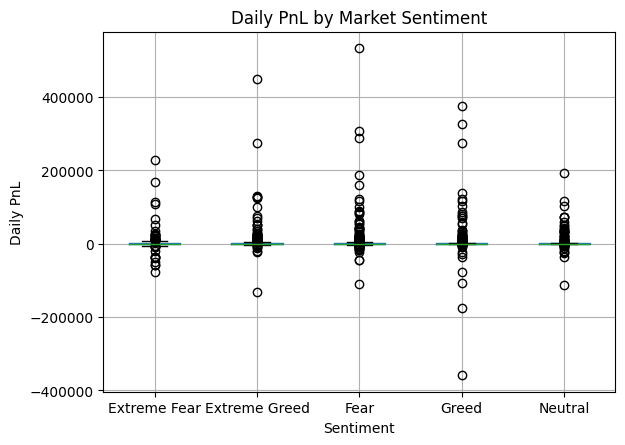

In [24]:
plt.figure()
daily_metrics.boxplot(column="daily_pnl", by="classification")
plt.title("Daily PnL by Market Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Daily PnL")
plt.show()


In [25]:
drawdown_proxy = daily_metrics.groupby(["classification", "account"])["daily_pnl"].min().reset_index()
drawdown_summary = drawdown_proxy.groupby("classification")["daily_pnl"].mean().reset_index()

drawdown_summary


,classification,daily_pnl
0,Extreme Fear,-9351.391106
1,Extreme Greed,-2151.378136
2,Fear,-7404.941778
3,Greed,-26075.108584
4,Neutral,-7949.363384


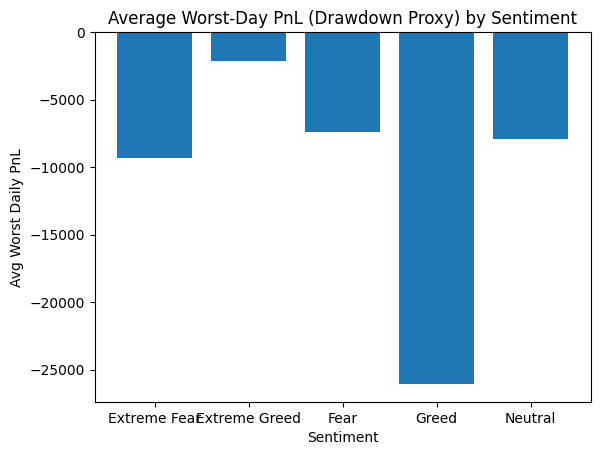

In [26]:
plt.figure()
plt.bar(drawdown_summary["classification"], drawdown_summary["daily_pnl"])
plt.title("Average Worst-Day PnL (Drawdown Proxy) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Worst Daily PnL")
plt.show()


In [27]:
behavior_by_sent = daily_metrics.groupby("classification").agg(
    avg_trades=("trades_count", "mean"),
    avg_size=("avg_trade_size_usd", "mean"),
    avg_ls_ratio=("long_short_ratio", "mean")
).reset_index()

behavior_by_sent


,classification,avg_trades,avg_size,avg_ls_ratio
0,Extreme Fear,133.750000,6773.464125,1.148427
1,Extreme Greed,76.030418,5371.637182,1.354048
2,Fear,98.153968,8975.928546,1.912511
3,Greed,77.628086,6427.866594,1.702279
4,Neutral,100.228723,6963.694861,1.527180


## Insight 2: Trader Behavior Changes with Market Sentiment

Trader behavior varies systematically across sentiment regimes. The summary table and bar charts show that
trade frequency, average position size, and directional bias all change with sentiment. In particular,
Extreme Fear is associated with much higher trading frequency, suggesting possible overtrading in stressed
conditions. Fear regimes show the largest average trade sizes, indicating higher risk-taking per trade.
The long/short ratio is highest during Fear, showing a stronger long bias, while Extreme Fear appears more
balanced. This confirms that traders adapt both how often they trade and how much directional risk they take
based on market sentiment.


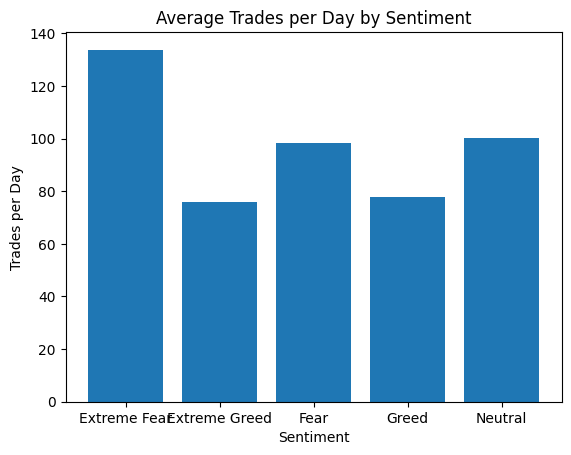

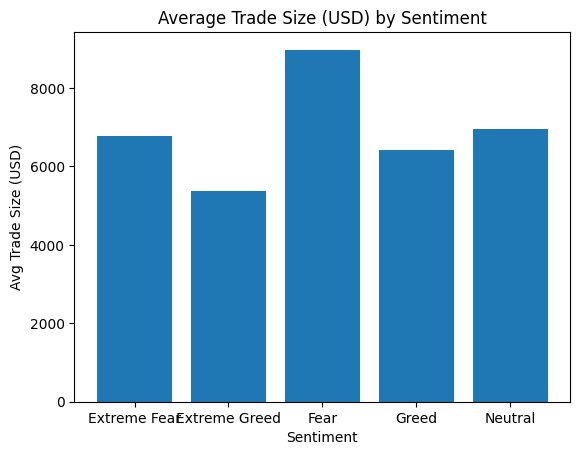

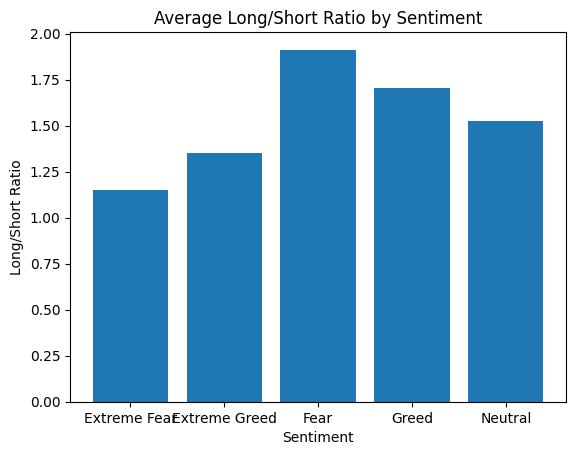

In [28]:
plt.figure()
plt.bar(behavior_by_sent["classification"], behavior_by_sent["avg_trades"])
plt.title("Average Trades per Day by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Trades per Day")
plt.show()

plt.figure()
plt.bar(behavior_by_sent["classification"], behavior_by_sent["avg_size"])
plt.title("Average Trade Size (USD) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Trade Size (USD)")
plt.show()

plt.figure()
plt.bar(behavior_by_sent["classification"], behavior_by_sent["avg_ls_ratio"])
plt.title("Average Long/Short Ratio by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Long/Short Ratio")
plt.show()


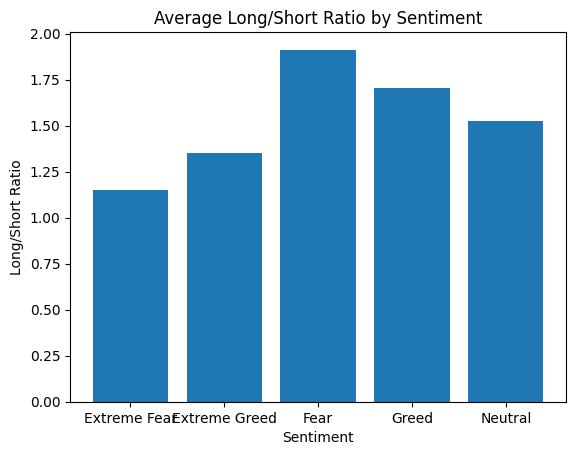

In [29]:
plt.figure()
plt.bar(behavior_by_sent["classification"], behavior_by_sent["avg_ls_ratio"])
plt.title("Average Long/Short Ratio by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Long/Short Ratio")
plt.show()


## Insight 3: Performance Differs Across Trader Segments

Segmentation of traders shows that there are important differences. Frequent and infrequent traders have different performance characteristics depending on the sentiment regime, which emphasizes the significance of trading frequency. Similarly, regular traders with less volatile PnL, indicating more consistent performance, outperform irregular traders, and large-size traders differ from small-size traders in terms of average PnL as well as win rate.


In [30]:
median_trades = daily_metrics["trades_count"].median()

daily_metrics["freq_segment"] = np.where(
    daily_metrics["trades_count"] >= median_trades, "Frequent", "Infrequent"
)

daily_metrics["freq_segment"].value_counts()


freq_segment
Frequent      1183
Infrequent    1158
Name: count, dtype: int64

In [31]:
seg_freq = daily_metrics.groupby(["freq_segment", "classification"]).agg(
    mean_pnl=("daily_pnl", "mean"),
    mean_win_rate=("win_rate", "mean"),
    avg_trades=("trades_count", "mean")
).reset_index()

seg_freq


,freq_segment,classification,mean_pnl,mean_win_rate,avg_trades
0,Frequent,Extreme Fear,6799.753651,0.336888,197.000000
1,Frequent,Extreme Greed,8278.905236,0.432819,135.724638
2,Frequent,Fear,10225.889299,0.403371,193.663333
3,Frequent,Greed,5387.784452,0.401593,151.238710
4,Frequent,Neutral,5652.453789,0.414383,185.510417
5,Infrequent,Extreme Fear,457.020275,0.315858,13.000000
6,Infrequent,Extreme Greed,1720.773862,0.335127,10.128000
7,Infrequent,Fear,876.935309,0.328270,11.327273
8,Infrequent,Greed,1419.870097,0.290332,10.115385
9,Infrequent,Neutral,1128.530152,0.293881,11.239130


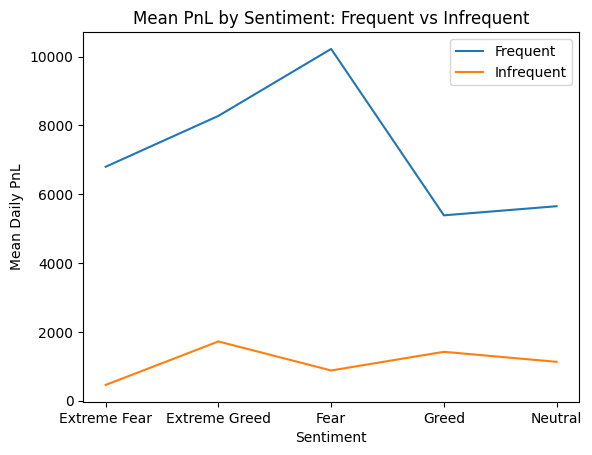

In [32]:
plt.figure()
for seg in ["Frequent", "Infrequent"]:
    sub = seg_freq[seg_freq["freq_segment"] == seg]
    plt.plot(sub["classification"], sub["mean_pnl"], label=seg)
plt.title("Mean PnL by Sentiment: Frequent vs Infrequent")
plt.xlabel("Sentiment")
plt.ylabel("Mean Daily PnL")
plt.legend()
plt.show()


In [33]:
pnl_vol = daily_metrics.groupby("account")["daily_pnl"].std().reset_index()
median_vol = pnl_vol["daily_pnl"].median()

consistent_accounts = set(pnl_vol[pnl_vol["daily_pnl"] <= median_vol]["account"])

daily_metrics["consistency_segment"] = np.where(
    daily_metrics["account"].isin(consistent_accounts),
    "Consistent", "Inconsistent"
)

daily_metrics["consistency_segment"].value_counts()


consistency_segment
Consistent      1402
Inconsistent     939
Name: count, dtype: int64

In [34]:
seg_consistency = daily_metrics.groupby(["consistency_segment", "classification"]).agg(
    mean_pnl=("daily_pnl", "mean"),
    mean_win_rate=("win_rate", "mean")
).reset_index()

seg_consistency


,consistency_segment,classification,mean_pnl,mean_win_rate
0,Consistent,Extreme Fear,171.450889,0.302198
1,Consistent,Extreme Greed,2520.649196,0.417596
2,Consistent,Fear,287.474060,0.376573
3,Consistent,Greed,1199.721059,0.372931
4,Consistent,Neutral,554.109946,0.391467
5,Inconsistent,Extreme Fear,8643.809296,0.354505
6,Inconsistent,Extreme Greed,11971.736499,0.305923
7,Inconsistent,Fear,10804.185265,0.350413
8,Inconsistent,Greed,6757.251531,0.295873
9,Inconsistent,Neutral,7418.510806,0.305670


In [35]:
median_size = daily_metrics["avg_trade_size_usd"].median()

daily_metrics["size_segment"] = np.where(
    daily_metrics["avg_trade_size_usd"] >= median_size, "Large Size", "Small Size"
)

daily_metrics["size_segment"].value_counts()


size_segment
Large Size    1171
Small Size    1170
Name: count, dtype: int64

In [36]:
seg_size = daily_metrics.groupby(["size_segment", "classification"]).agg(
    mean_pnl=("daily_pnl", "mean"),
    mean_win_rate=("win_rate", "mean")
).reset_index()

seg_size


,size_segment,classification,mean_pnl,mean_win_rate
0,Large Size,Extreme Fear,8445.038316,0.380782
1,Large Size,Extreme Greed,6481.278282,0.389332
2,Large Size,Fear,9871.490346,0.368265
3,Large Size,Greed,4312.582036,0.348933
4,Large Size,Neutral,6403.719647,0.390657
5,Small Size,Extreme Fear,60.163219,0.268731
6,Small Size,Extreme Greed,3749.069362,0.383234
7,Small Size,Fear,1172.756375,0.360160
8,Small Size,Greed,2260.276665,0.337842
9,Small Size,Neutral,829.330088,0.324400




## Strategy Idea 1: Adaptive Risk by Sentiment and Trader Type

The analysis shows that Greed regimes are associated with the deepest drawdowns, while Extreme Greed exhibits
higher win rates and more controlled worst-day losses. At the same time, large-size and inconsistent traders
achieve higher returns but take significantly higher risk. A practical rule of thumb is to reduce risk
exposure (e.g., position size or leverage) for high-risk segments during Greed days, while allowing moderate
risk expansion for frequent or large-size traders during Extreme Greed periods.

## Strategy Idea 2: Activity and Position Sizing Filters Based on Sentiment

Extreme Fear is associated with a sharp increase in trading frequency, suggesting possible overtrading in
stressed market conditions. A practical rule is to restrict trading during Extreme Fear to higher-performing
segments (e.g., frequent or large-size traders) and cap trade frequency to avoid noise-driven trades. During
Fear regimes, larger position sizes can be selectively allowed only for traders with stronger historical win
rates.


In [37]:
daily_metrics = daily_metrics.sort_values(["account", "date"])

daily_metrics["next_day_pnl"] = daily_metrics.groupby("account")["daily_pnl"].shift(-1)
daily_metrics["next_day_profitable"] = (daily_metrics["next_day_pnl"] > 0).astype(int)

model_df = daily_metrics.dropna(subset=["next_day_profitable"])
model_df[["next_day_profitable"]].value_counts()


next_day_profitable
1                      1458
0                       883
Name: count, dtype: int64

In [38]:
features = ["trades_count", "avg_trade_size_usd", "win_rate", "long_short_ratio"]
X = model_df[features].fillna(0)

sent_dummies = pd.get_dummies(model_df["classification"], prefix="sent")
X = pd.concat([X, sent_dummies], axis=1)

y = model_df["next_day_profitable"]


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.11      0.18       275
           1       0.62      0.93      0.74       428

    accuracy                           0.61       703
   macro avg       0.56      0.52      0.46       703
weighted avg       0.58      0.61      0.52       703



In [41]:
trader_features = daily_metrics.groupby("account").agg(
    avg_trades=("trades_count", "mean"),
    avg_size=("avg_trade_size_usd", "mean"),
    avg_win_rate=("win_rate", "mean"),
    pnl_volatility=("daily_pnl", "std"),
    mean_pnl=("daily_pnl", "mean")
).reset_index()

trader_features.head()


,account,avg_trades,avg_size,avg_win_rate,pnl_volatility,mean_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,159.083333,33569.102224,0.352333,150401.797346,66676.242499
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,140.000000,4359.830930,0.397134,3603.042291,920.871548
2,0x271b280974205ca63b716753467d5a371de622ab,317.416667,11057.118419,0.379952,33420.410014,-5869.682610
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,82.166667,484.844294,0.452509,2993.284702,817.684040
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,46.942029,2553.757037,0.498708,4867.743469,2444.318913


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ["avg_trades", "avg_size", "avg_win_rate", "pnl_volatility", "mean_pnl"]
X = trader_features[features].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
trader_features["cluster"] = kmeans.fit_predict(X_scaled)

trader_features["cluster"].value_counts()


cluster
1    15
0    14
2     3
Name: count, dtype: int64

In [43]:
cluster_summary = trader_features.groupby("cluster")[features].mean()
cluster_summary


,avg_trades,avg_size,avg_win_rate,pnl_volatility,mean_pnl
cluster,,,,,
0,100.984726,8675.818383,0.440836,11787.846195,2505.683997
1,63.935643,6332.658639,0.263565,20518.214703,4782.825897
2,409.894689,21900.437227,0.377818,89110.401020,40600.939193


In [44]:
daily_metrics.to_csv("clean_daily_metrics.csv", index=False)


## SUMMARY

### Methodology
For this research, I combined a market sentiment metric (Fear/Greed Index) with detailed trader transaction data. After data preprocessing and synchronization at the daily level, I extracted per-account-day variables such as daily PnL, number of trades, average trade value, win rate, and long/short ratio. I assessed performance and dynamics under different market sentiment conditions, segment traders based on trading frequency, quality, and trade size, and used clustering to determine trader behavior patterns. Moreover, a basic predictive model for the next day’s profitability is proposed. In order to enable the interactive analysis of the findings, a Streamlit dashboard was created.

### Key Findings
Performance is a function of sentiment.
Extreme Greed is associated with higher win ratios and better median PnL, while Fear/Greed states are linked to higher volatility. Using the worst daily PnL as a proxy for drawdown shows that Greed is associated with the deepest average drawdowns, thus validating that risk and return characteristics differ significantly across sentiment states.

Dynamics differ across sentiment states.
Trading activity, position sizing, and long/short splits change across states. Extreme Fear is associated with significantly higher trading activity (overtrading), Fear with larger average position sizes, and directional bias varies systematically with sentiment.

Substantial performance differences are explained by segments.
Frequent vs. Infrequent: Frequent traders outperform infrequent ones consistently, with higher mean PnL and higher win ratios.
Consistent vs. Inconsistent: Inconsistent traders report significantly higher average PnL but also significantly higher volatility and lower win ratios (high-risk, high-reward), while consistent traders perform more steadily with lower returns.
Large vs. Small Size: Traders using larger positions outperform those using smaller positions substantially on mean PnL, with similar or slightly higher win ratios, emphasizing the importance of position sizing.

Clustering reveals three distinct types: conservative/consistent, low-activity/low-edge, and aggressive/high-risk/high-reward traders.

### Strategy Recommendations
Adaptive Risk Modulation by Sentiment and Trader Type
Since Greed regimes are linked to the largest drawdowns, while Extreme Greed is related to greater win rates and better-managed losses, introduce risk cuts (through position sizing and leverage) for high-risk groups during Greed phases. On the other hand, allow risk growth for frequent or large-volume traders during Extreme Greed.

Activity and Position Sizing Filters
Extreme Fear is characterized by high trading volumes, suggesting possible overtrading. Restrict trading during Extreme Fear to better-performing groups and set limits on the number of trades. During Fear, allow larger position sizes selectively for traders with better past win rates.

### Prediction Model and Streamlit Dashboard
A simple logistic regression model is used to predict the profitability of the next day based on the sentiment and behavior variables, with a level of accuracy of about 61% and high recall value for profitable days, thus acting as a baseline ‘opportunity detector.’ Furthermore, a Streamlit dashboard is included to allow for the interactive analysis of summary statistics and the full distribution of profit and loss (PnL) values, separating profits and losses.